# Degree gap versus staircase gap

In [1]:
using TypedPolynomials
using SemialgebraicSets
function system(k, solver)
    @polyvar x y
    return @set x == y^k && y^k == 0 solver
end
using Random
Random.seed!(80)

Random.TaskLocalRNG()

Let's start with the classical approach with all columns up to degree 5 and waiting for the gap:

In [2]:
using MacaulayMatrix
sys_gap = system(4, MacaulayMatrix.Solver(sparse_columns = false, wait_for_gap = true))
solutions = collect(sys_gap)
nothing #hide

[ Info: Added 2 rows to complete columns up to degree 4
[ Info: Nullspace of dimensions (15, 13) computed from Macaulay matrix of dimension (2, 15) in 5.3369e-5 seconds.
[ Info: Added 4 rows to complete columns up to degree 5
[ Info: Nullspace of dimensions (21, 15) computed from Macaulay matrix of dimension (6, 21) in 3.5306e-5 seconds.
[ Info: Added 6 rows to complete columns up to degree 6
[ Info: Nullspace of dimensions (28, 16) computed from Macaulay matrix of dimension (12, 28) in 4.4804e-5 seconds.
[ Info: Added 8 rows to complete columns up to degree 7
[ Info: Nullspace of dimensions (36, 16) computed from Macaulay matrix of dimension (20, 36) in 5.9761e-5 seconds.
[ Info: Found multiplication matrices with commutation error of `0.5555434329742673` which is larger than the tolerance of `0.0001220703125`. Adding this to the equations and continuing.
[ Info: Found multiplication matrices with commutation error of `0.14137366352981615` which is larger than the tolerance of `0.0001

We find the expected solution

In [3]:
solutions

1-element Vector{Vector{Float64}}:
 [-1.7687461110662856e-16, -0.39155425716877207]

If we don't wait for the gap, we get it earlier:

In [4]:
using MacaulayMatrix
sys = system(4, MacaulayMatrix.Solver(sparse_columns = false))
solutions = collect(sys)
nothing #hide

[ Info: Added 2 rows to complete columns up to degree 4
[ Info: Nullspace of dimensions (15, 13) computed from Macaulay matrix of dimension (2, 15) in 4.272e-5 seconds.
┌ Warning: `LAPACK.trsen!` throwed an exception for `[3, 4]` so using default tolerance `2.220446049250313e-16`
└ @ SemialgebraicSets ~/.julia/packages/SemialgebraicSets/BoKut/src/schur.jl:22
[ Info: Found 1 real solution


We find the expected solution

In [5]:
solutions

1-element Vector{Vector{Float64}}:
 [-1.962615573354718e-16, -1.1927117914146596e-16]

But we can actually also just use the 2 columns that are actually used:

In [6]:
sys_sparse = system(4, MacaulayMatrix.Solver())
solutions = collect(sys_sparse)
nothing #hide

[ Info: Added 2 rows to complete columns up to degree 4
[ Info: Nullspace of dimensions (2, 0) computed from Macaulay matrix of dimension (2, 2) in 1.8896e-5 seconds.
[ Info: Found 1 real solution


We find the expected solution

In [7]:
solutions

1-element Vector{Vector{Float64}}:
 [0.0, 0.0]

## In more details

In [8]:
solver_gap = init(sys_gap, sys_gap.solver)

MacaulayMatrix matrix solver. Last iteration considered:
0×0 Macaulay matrix for polynomials:
  x - y^4
  y^4
The row shifts are:
MonomialBasis([])
The column basis is:
MonomialBasis([])
Current status is OPTIMIZE_NOT_CALLED
History of iterations:
0×3 DataFrame
 Row │ nullity  num_rows  num_cols
     │ Int64    Int64     Int64
─────┴─────────────────────────────

After one step, we don't have the solution yet

In [9]:
step!(solver_gap)

[ Info: Added 2 rows to complete columns up to degree 4
[ Info: Nullspace of dimensions (15, 13) computed from Macaulay matrix of dimension (2, 15) in 4.9843e-5 seconds.


After the second step, still no solution

In [10]:
step!(solver_gap)

[ Info: Added 4 rows to complete columns up to degree 5
[ Info: Nullspace of dimensions (21, 15) computed from Macaulay matrix of dimension (6, 21) in 2.9596e-5 seconds.


After the third step, still no solution

In [11]:
step!(solver_gap)

[ Info: Added 6 rows to complete columns up to degree 6
[ Info: Nullspace of dimensions (28, 16) computed from Macaulay matrix of dimension (12, 28) in 4.1718e-5 seconds.


After the fourth step, we find the solution

In [12]:
step!(solver_gap)

[ Info: Added 8 rows to complete columns up to degree 7
[ Info: Nullspace of dimensions (36, 16) computed from Macaulay matrix of dimension (20, 36) in 6.1876e-5 seconds.
[ Info: Found multiplication matrices with commutation error of `0.5555434329742673` which is larger than the tolerance of `0.0001220703125`. Adding this to the equations and continuing.
[ Info: Found multiplication matrices with commutation error of `0.14137366352981615` which is larger than the tolerance of `0.0001220703125`. Adding this to the equations and continuing.
[ Info: Found multiplication matrices with commutation error of `0.32931221645105807` which is larger than the tolerance of `0.0001220703125`. Adding this to the equations and continuing.
[ Info: Found 1 real solution


We can inspect the solver at follows

In [13]:
solver_gap

MacaulayMatrix matrix solver. Last iteration considered:
20×36 Macaulay matrix for polynomials:
  x - y^4
  y^4
The row shifts are:
MonomialBasis([1, y, x, y^2, x*y, x^2, y^3, x*y^2, x^2*y, x^3])
The column basis is:
MonomialBasis([1, y, x, y^2, x*y, x^2, y^3, x*y^2, x^2*y, x^3, y^4, x*y^3, x^2*y^2, x^3*y, x^4, y^5, x*y^4, x^2*y^3, x^3*y^2, x^4*y, x^5, y^6, x*y^5, x^2*y^4, x^3*y^3, x^4*y^2, x^5*y, x^6, y^7, x*y^6, x^2*y^5, x^3*y^4, x^4*y^3, x^5*y^2, x^6*y, x^7])
BorderBasis with independent rows and dependent columns in:
BasisDependence for bases:
 Standard:
 MonomialBasis([1, y, y^2, y^3])
 Corners:
 MonomialBasis([x, y^4])
 Dependent Border:
 MonomialBasis([x*y, x*y^2, x*y^3])

And entries in a 4×5 adjoint(::Matrix{Float64}) with eltype Float64:
 -2.172825010123334e-16   1.8952692539670457e-16  …  -2.7755575615628892e-17
 -1.062601985498177e-16   1.8952692539670447e-16      2.7755575615628944e-17
  5.55111512312578e-17   -1.1102230246251565e-16     -2.775557561562892e-17
  6.94301580

The border dependence can be plotted for more visual inspection:

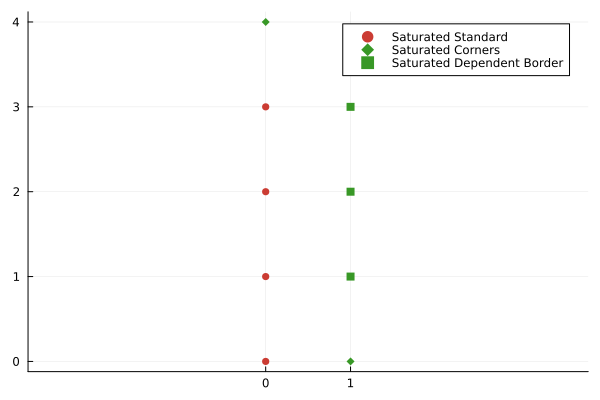

In [14]:
using Plots
plot(saturated_dependence(solver_gap))

We can see that the monomials of larger degree have not been used here.
We can see them used with `AnyDependence` instead of `StaircaseDependence`

In [15]:
solver_gap = init(sys_gap, MacaulayMatrix.Solver(dependence = MacaulayMatrix.MM.LinearDependence, sparse_columns = false, wait_for_gap = true))

MacaulayMatrix matrix solver. Last iteration considered:
0×0 Macaulay matrix for polynomials:
  x - y^4
  y^4
The row shifts are:
MonomialBasis([])
The column basis is:
MonomialBasis([])
Current status is OPTIMIZE_NOT_CALLED
History of iterations:
0×3 DataFrame
 Row │ nullity  num_rows  num_cols
     │ Int64    Int64     Int64
─────┴─────────────────────────────

Let's solve again but not all the step at once:

In [16]:
solve!(solver_gap)

[ Info: Added 2 rows to complete columns up to degree 4
[ Info: Nullspace of dimensions (15, 13) computed from Macaulay matrix of dimension (2, 15) in 7.6874e-5 seconds.
[ Info: Added 4 rows to complete columns up to degree 5
[ Info: Nullspace of dimensions (21, 15) computed from Macaulay matrix of dimension (6, 21) in 2.6569e-5 seconds.
[ Info: Added 6 rows to complete columns up to degree 6
[ Info: Nullspace of dimensions (28, 16) computed from Macaulay matrix of dimension (12, 28) in 3.749e-5 seconds.
[ Info: Added 8 rows to complete columns up to degree 7
[ Info: Nullspace of dimensions (36, 16) computed from Macaulay matrix of dimension (20, 36) in 5.927e-5 seconds.
[ Info: Found multiplication matrices with commutation error of `0.5555434329742674` which is larger than the tolerance of `0.0001220703125`. Adding this to the equations and continuing.
[ Info: Found multiplication matrices with commutation error of `0.1413736635298159` which is larger than the tolerance of `0.0001220

1-element Vector{Vector{Float64}}:
 [-1.7687461110662856e-16, -0.3915542571687721]

This time, we see the monomials at infinity as the blue balls outside the staircase.
We can see that the degree 4 contains no independent as it is the gap zone.

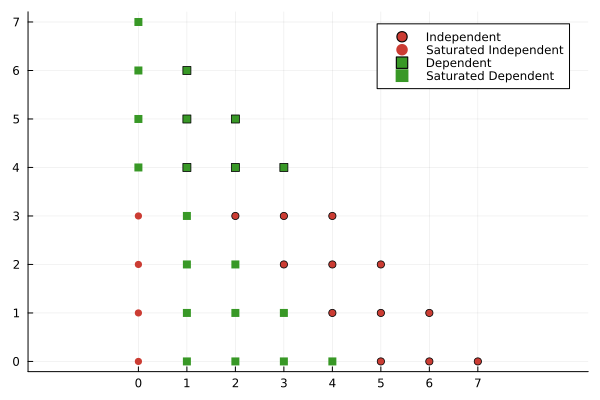

In [17]:
using Plots
plot(saturated_dependence(solver_gap))

## Not waiting for the gap in more details

In [18]:
solver = init(sys, sys.solver)

MacaulayMatrix matrix solver. Last iteration considered:
0×0 Macaulay matrix for polynomials:
  x - y^4
  y^4
The row shifts are:
MonomialBasis([])
The column basis is:
MonomialBasis([])
Current status is OPTIMIZE_NOT_CALLED
History of iterations:
0×3 DataFrame
 Row │ nullity  num_rows  num_cols
     │ Int64    Int64     Int64
─────┴─────────────────────────────

After one step, we find the solution

In [19]:
step!(solver)

[ Info: Added 2 rows to complete columns up to degree 4
[ Info: Nullspace of dimensions (15, 13) computed from Macaulay matrix of dimension (2, 15) in 4.8981e-5 seconds.
[ Info: Found 1 real solution


We can inspect `m` for more details

In [20]:
solver

MacaulayMatrix matrix solver. Last iteration considered:
2×15 Macaulay matrix for polynomials:
  x - y^4
  y^4
The row shifts are:
MonomialBasis([1])
The column basis is:
MonomialBasis([1, y, x, y^2, x*y, x^2, y^3, x*y^2, x^2*y, x^3, y^4, x*y^3, x^2*y^2, x^3*y, x^4])
BorderBasis with independent rows and dependent columns in:
BasisDependence for bases:
 Standard:
 MonomialBasis([1, y, y^2, y^3])
 Corners:
 MonomialBasis([x, y^4])
 Independent Border:
 MonomialBasis([x*y, x*y^2, x*y^3])

And entries in a 4×2 adjoint(::Matrix{Float64}) with eltype Float64:
 -1.9626155733547191e-16  -3.925231146709439e-17
 -1.1775693440128314e-16  -1.1775693440128314e-16
  0.0                      0.0
  0.0                      0.0
Current status is OPTIMAL
Found 1 solutions:
  [-1.962615573354719e-16, 7.031051088568496e-17]
History of iterations:
1×3 DataFrame
 Row │ nullity  num_rows  num_cols
     │ Int64    Int64     Int64
─────┼─────────────────────────────
   1 │      13         2        15

The border dependence can be plotted for more visual inspection:

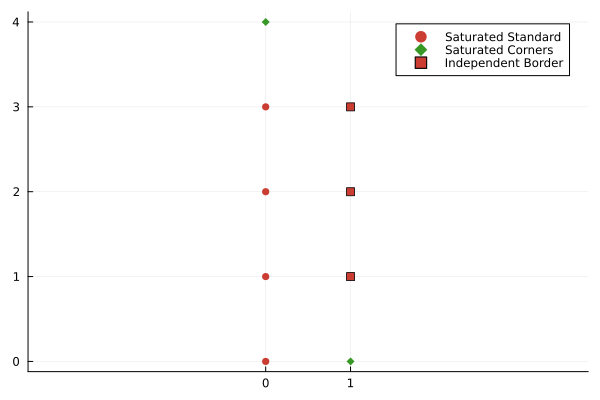

In [21]:
plot(saturated_dependence(solver))

Even if there is no gap, the border is complete so we can get the multiplication matrices.

## Sparse columns in more details

In [22]:
sparse_solver = init(sys_sparse, sys_sparse.solver)

MacaulayMatrix matrix solver. Last iteration considered:
0×0 Macaulay matrix for polynomials:
  x - y^4
  y^4
The row shifts are:
MonomialBasis([])
The column basis is:
MonomialBasis([])
Current status is OPTIMIZE_NOT_CALLED
History of iterations:
0×3 DataFrame
 Row │ nullity  num_rows  num_cols
     │ Int64    Int64     Int64
─────┴─────────────────────────────

After one step, we find the solution

In [23]:
step!(sparse_solver)

[ Info: Added 2 rows to complete columns up to degree 4
[ Info: Nullspace of dimensions (2, 0) computed from Macaulay matrix of dimension (2, 2) in 1.6571e-5 seconds.
[ Info: Found 1 real solution


We can inspect `m` for more details

In [24]:
sparse_solver

MacaulayMatrix matrix solver. Last iteration considered:
2×2 Macaulay matrix for polynomials:
  x - y^4
  y^4
The row shifts are:
MonomialBasis([1])
The column basis is:
MonomialBasis([x, y^4])
BorderBasis with independent rows and dependent columns in:
BasisDependence for bases:
 Trivial Standard:
 MonomialBasis([1, y, y^2, y^3])
 Corners:
 MonomialBasis([x, y^4])
 Trivial Independent Border:
 MonomialBasis([x*y, x*y^2, x*y^3])

And entries in a 0×2 adjoint(::Matrix{Float64}) with eltype Float64
Current status is OPTIMAL
Found 1 solutions:
  [0.0, 0.0]
History of iterations:
1×3 DataFrame
 Row │ nullity  num_rows  num_cols
     │ Int64    Int64     Int64
─────┼─────────────────────────────
   1 │       0         2         2

The border dependence can be plotted for more visual inspection:

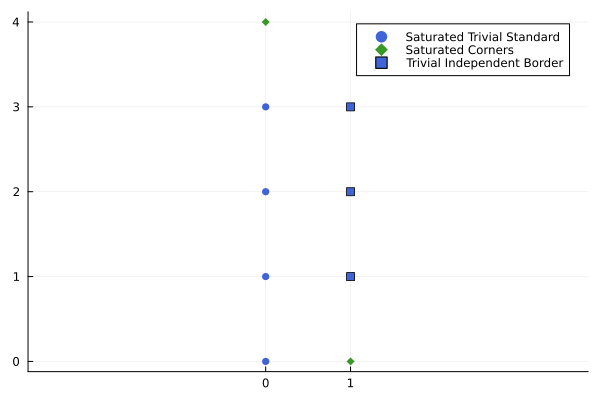

In [25]:
plot(saturated_dependence(sparse_solver))

As we can see, for the sparse one, the standard monomials are "trivial"
because they are trivially detected as independent since they are not part of the basis.
The border is missing but the multiplication matrix for `y` can be computed first
and then, using this multiplication matrix, the missing relations for the border
can be obtained and then the multiplication matrix for `x` can be obtained.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*